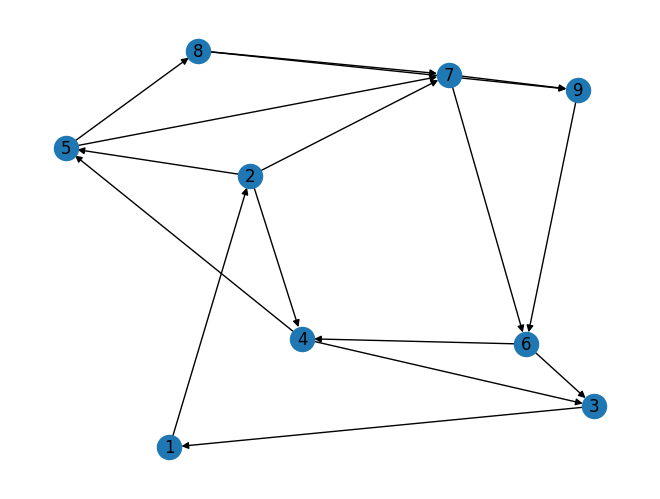

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

with open("zac.in", "r") as f:
    n = int(f.readline())

    G = nx.DiGraph()
    for i in range(n):
        v1, v2= list(map(int, f.readline().split(" ")))
        G.add_edge(v1, v2)
    nx.draw(G,with_labels=True)
    


In [3]:
def cycle(graph):
    try:
        c = nx.find_cycle(graph)
        print(c)
        return c
    except Exception:
        print(None)
        return None
cycle(G)

[(1, 2), (2, 4), (4, 3), (3, 1)]


[(1, 2), (2, 4), (4, 3), (3, 1)]

16


14

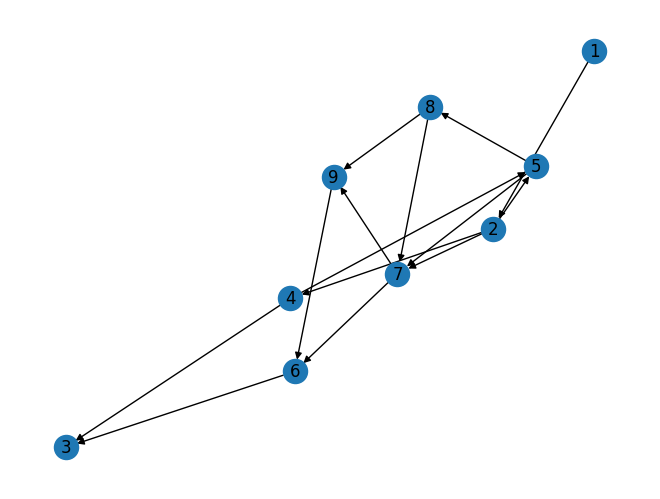

In [4]:
sort_mode = "ain" # "din", "aout", "dout"
dir_mode = "f" # "b"

def get_some_FAS(G, sort_mode="ain",dir_mode="f"):
    
    assert sort_mode in ["ain", "din", "aout", "dout"]
    assert dir_mode in ["f","b"]
    
    rr = []

    for scc in nx.strongly_connected_components(G):
        H = G.subgraph(scc)
        # nx.draw(H,with_labels=True)
        degs = list(H.in_degree() if "in" in sort_mode else H.out_degree())
        degs.sort(key=lambda x: (x[1], x[0]),reverse="d" in sort_mode)
        # print(degs)
        node_order = [x[0] for x in degs]
        # print(node_order)
        
        if dir_mode == "f":
            edges_b = [(v1,v2) for (v1, v2) in H.edges() if node_order.index(v1) > node_order.index(v2)]
            outE = edges_b
        elif dir_mode == "b":
            edges_f = [(v1,v2) for (v1, v2) in H.edges() if node_order.index(v1) < node_order.index(v2)]
            outE = edges_f
            
        
        # inE = edges_f if dir_mode == "f" else edges_b
        outE = edges_b if dir_mode == "f" else edges_f # F
        # print(sorted(inE),sorted(outE))
        
        K = nx.DiGraph(H)
        K.remove_edges_from(outE)
        # K = H.subgraph(inE).copy()
        # nx.draw(K,with_labels=True)
        # print("KKKKK: ", sorted(K.edges()))
        
        def cycle(graph):
            try:
                c = nx.find_cycle(graph)
                return c
            except Exception:
                return None
        # print("K cyc: ",cycle(K))
        # smartAE
        for v1, v2 in outE:
            K.add_edge(v1,v2)
            if cycle(K):
                K.remove_edge(v1,v2)
        
        r = list(K.edges())
        r.sort()
        rr = rr + r
        nx.draw(K,with_labels=True)
    return rr
        
        
print(len(G.edges()))
len(get_some_FAS(G))
    

    
    

In [5]:
# sort_mode = "ain" # "din", "aout", "dout"
# dir_mode = "f" # "b"

# def FAS_of_scc(H, sort_mode="ain",dir_mode="f"):
    
#     assert sort_mode in ["ain", "din", "aout", "dout"]
#     assert dir_mode in ["f","b"]
#     assert nx.is_strongly_connected(H)

#     degs = list(H.in_degree() if "in" in sort_mode else H.out_degree())
#     degs.sort(key=lambda x: (x[1], x[0]),reverse="d" in sort_mode)
#     node_order = [x[0] for x in degs]
    
#     if dir_mode == "f":
#         edges_b = [(v1,v2) for (v1, v2) in H.edges() if node_order.index(v1) > node_order.index(v2)]
#         outE = edges_b
#     elif dir_mode == "b":
#         edges_f = [(v1,v2) for (v1, v2) in H.edges() if node_order.index(v1) < node_order.index(v2)]
#         outE = edges_f
        
#     outE = edges_b if dir_mode == "f" else edges_f # F
    
#     K = nx.DiGraph(H)
#     K.remove_edges_from(outE)
    
#     def cycle(graph):
#         try:
#             c = nx.find_cycle(graph)
#             print(c)
#             return c
#         except Exception:
#             return None
        
#     while len(outE) > 0:
#         count = 0
#         while count < len(outE):
#             # en increment pointerja pride iz zamika pri pop, drugi pa pri povečanja counterja uspešno dodanih povezav
#             (v1, v2) = outE.pop(count)
#             K.add_edge(v1,v2)
#             if cycle(K):
#                 K.remove_edge(v1,v2)
#             else:
#                 count += 1
    
#     r = list(K.edges())
#     r.sort()
#     nx.draw(K,with_labels=True,pos = nx.circular_layout(K))
#     return r

# def get_some_FAS(G, sort_mode="ain",dir_mode="f"):
    
#     assert sort_mode in ["ain", "din", "aout", "dout"]
#     assert dir_mode in ["f","b"]
    
#     rr = []

#     for scc in nx.strongly_connected_components(G):
#         r = FAS_of_scc(G.subgraph(scc), sort_mode=sort_mode,dir_mode=dir_mode)
#         rr = rr + r
    
#     return rr
        
# nx.draw(G,with_labels=True,pos = nx.circular_layout(G))
# plt.show()
# print(len(G.edges()))
# len(get_some_FAS(G))
    

    
    

INFO: Settings are: sort_mode = 'ain' and dir_mode = 'f'.
INFO: Cycle [(1, 2), (2, 4), (4, 3), (3, 1)] emerged when edge (3, 1) was added. Removed this edge.
INFO: Cycle [(4, 5), (5, 7), (7, 6), (6, 4)] emerged when edge (6, 4) was added. Removed this edge.
INFO: 14 out of 16 edges remain in graph.


[(1, 2),
 (2, 4),
 (2, 5),
 (2, 7),
 (4, 3),
 (4, 5),
 (5, 7),
 (5, 8),
 (6, 3),
 (7, 6),
 (7, 9),
 (8, 7),
 (8, 9),
 (9, 6)]

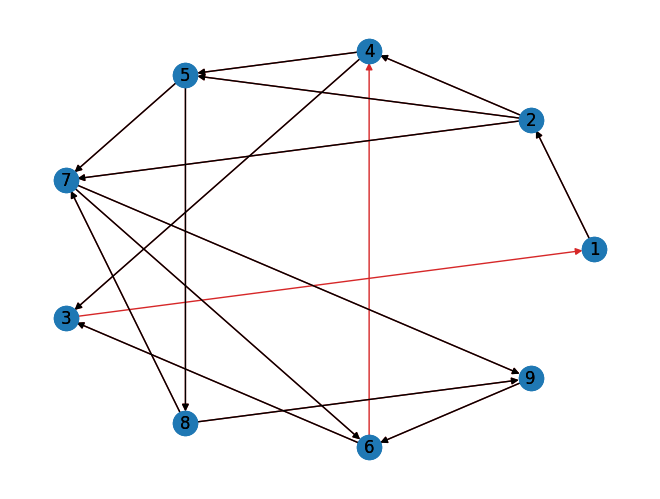

In [6]:
sort_mode = "ain" # "din", "aout", "dout"
dir_mode = "f" # "b"
  


def get_some_FAS(G, sort_mode="ain",dir_mode="f",plot=False,verbose=False):
    
    if verbose:
        print(f"INFO: Settings are: sort_mode = '{sort_mode}' and dir_mode = '{dir_mode}'.")
    
    assert sort_mode in ["ain", "din", "aout", "dout"]
    assert dir_mode in ["f","b"]
    

    def FAS_of_scc(H, sort_mode="ain",dir_mode="f",plot = False, verbose=False):

        degs = list(H.in_degree() if "in" in sort_mode else H.out_degree())
        degs.sort(key=lambda x: (x[1], x[0]),reverse="d" in sort_mode)
        node_order = [x[0] for x in degs]
        
        if dir_mode == "f":
            edges_b = [(v1,v2) for (v1, v2) in H.edges() if node_order.index(v1) > node_order.index(v2)]
            outE = edges_b
        elif dir_mode == "b":
            edges_f = [(v1,v2) for (v1, v2) in H.edges() if node_order.index(v1) < node_order.index(v2)]
            outE = edges_f
        
        outE = edges_b if dir_mode == "f" else edges_f # F
        
        K = nx.DiGraph(H)
        K.remove_edges_from(outE)
        
        def cycle(graph):
            try:
                c = nx.find_cycle(graph)
                return c
            except Exception:
                return None
        
        while len(outE) > 0:
            count = 0
            while count < len(outE):
                # en increment pointerja pride iz zamika pri pop,
                # drugi pa pri povečanja counterja uspešno dodanih povezav
                (v1, v2) = outE.pop(count)
                K.add_edge(v1,v2)
                c = cycle(K)
                if c is not None:
                    if verbose:
                        print(f"INFO: Cycle {c} emerged when edge {(v1,v2)} was added. Removed this edge.")
                    K.remove_edge(v1,v2)
                else:
                    count += 1
        
        r = list(K.edges())
        r.sort()
        if plot:
            nx.draw(H,with_labels=True,pos = nx.circular_layout(H),edge_color="tab:red")
            nx.draw(K,with_labels=True,pos = nx.circular_layout(K))
        return r

    
    rr = []

    for scc in nx.strongly_connected_components(G):
        r = FAS_of_scc(G.subgraph(scc), sort_mode=sort_mode,dir_mode=dir_mode,plot=plot,verbose=verbose)
        rr = rr + r
    
    
    print(f"INFO: {len(rr)} out of {len(G.edges())} edges remain in graph.")
    return rr
        
get_some_FAS(G,plot=True,verbose=True)
    

    
    

True

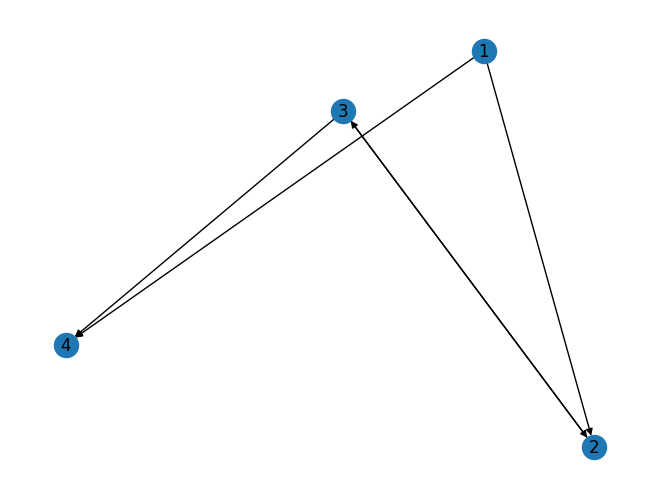

In [7]:
G = nx.DiGraph()
# G.add_edges_from([(2,1),(3,2),(1,3),(1,4),(4,3)])
G.add_edges_from([(1,2),(2,3),(3,2),(3,4),(1,4)])
nx.draw(G,with_labels=True)
# nx.diameter(G)
nx.is_bipartite(G)

In [8]:
A= nx.adjacency_matrix(G).todense()
print(A)
import numpy as np
len(np.where(A+A.T == 2))/2

[[0 1 0 1]
 [0 0 1 0]
 [0 1 0 1]
 [0 0 0 0]]


1.0

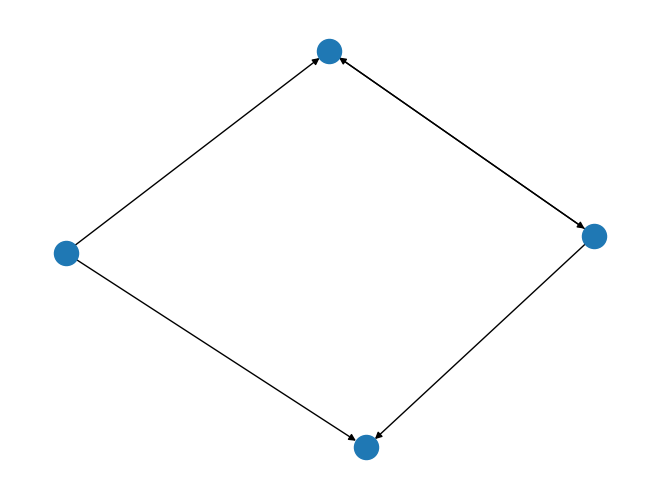

In [9]:
nx.draw(G)

In [10]:
nx.node_connectivity(G)
# nx.is_strongly_connected(G)

0

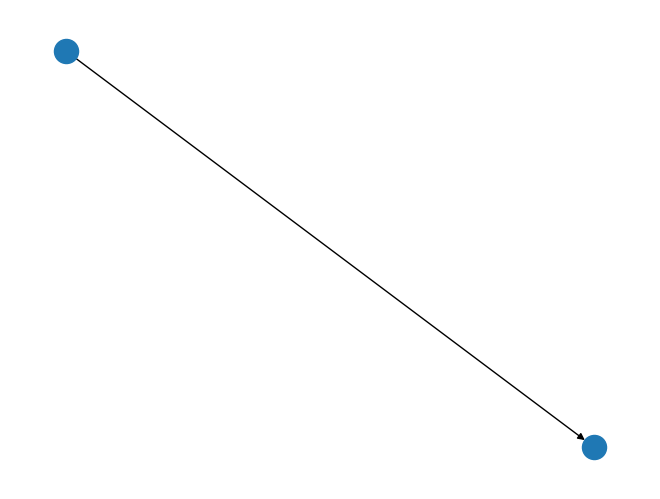

In [11]:
G = nx.DiGraph()
G.add_edges_from([(1,1),(1,2)])

G.remove_edges_from(list(nx.selfloop_edges(G)))
nx.draw(G)